<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span><ul class="toc-item"><li><span><a href="#Copying-images-to-training,-validation,-and-test-directories" data-toc-modified-id="Copying-images-to-training,-validation,-and-test-directories-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Copying images to training, validation, and test directories</a></span></li></ul></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building the network</a></span><ul class="toc-item"><li><span><a href="#Configuring-the-model-for-training" data-toc-modified-id="Configuring-the-model-for-training-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Configuring the model for training</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Using-ImageDataGenerator-to-read-images-from-directories" data-toc-modified-id="Using-ImageDataGenerator-to-read-images-from-directories-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Using <code>ImageDataGenerator</code> to read images from directories</a></span></li><li><span><a href="#Fitting-the-model-using-a-batch-generator" data-toc-modified-id="Fitting-the-model-using-a-batch-generator-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fitting the model using a batch generator</a></span></li><li><span><a href="#Saving-the-model" data-toc-modified-id="Saving-the-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Saving the model</a></span></li></ul></li><li><span><a href="#Displaying-curves-of-loss-and-accuracy-during-training" data-toc-modified-id="Displaying-curves-of-loss-and-accuracy-during-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Displaying curves of loss and accuracy during training</a></span></li></ul></div>

# Loading the data

## Copying images to training, validation, and test directories 

In [33]:
import os, shutil

In [34]:
original_dataset_dir  = '/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/train/'

In [35]:
base_dir = '/home/abanihi/Documents/deep-data/kaggle/dogs-vs-cats/cats_and_dogs_small'
os.mkdir(base_dir)

In [36]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [37]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [38]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [39]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [40]:
val_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(val_dogs_dir)

- Copy the first 1,000 cat images to train_cats_dir

In [41]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              


- Copy the next 500 cat images to validation_cats_dir

In [42]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(val_cats_dir, fname)                         
    shutil.copyfile(src, dst)     

- Copy the next 500 cat images to test_cats_dir 

In [43]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                         
    shutil.copyfile(src, dst)     

In [44]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              


In [45]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(val_dogs_dir, fname)                         
    shutil.copyfile(src, dst)     

In [46]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                         
    shutil.copyfile(src, dst)     

As a sanity check let's count how many pictures are in each training split (train/validation/test):

In [47]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [48]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [49]:
print('total validation cat images:', len(os.listdir(val_cats_dir)))

total validation cat images: 500


In [50]:
print('total validation dog images:', len(os.listdir(val_dogs_dir)))

total validation dog images: 500


In [51]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [52]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# Building the network

In [53]:
from keras import layers 
from keras import models

Using TensorFlow backend.


In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Configuring the model for training

In [56]:
from keras import optimizers

In [57]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# Data Preprocessing

Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
    1. Read the picture files
    2. Decode the JPEG content to RGB grids of pixels
    3. Convert these into floating-point tensors
    4. Rescale the pixel values to the [0-1] interval
    
Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

## Using ```ImageDataGenerator``` to read images from directories

In [58]:
from keras.preprocessing.image import ImageDataGenerator

In [59]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [61]:
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [63]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


Let’s fit the model to the data using the generator. We do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, we can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.


## Fitting the model using a batch generator

In [64]:
%%time 
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 41s 408ms/step - loss: 0.6892 - acc: 0.5465 - val_loss: 0.6769 - val_acc: 0.5770
Epoch 2/30
100/100 [==============================] - 32s 320ms/step - loss: 0.6608 - acc: 0.5955 - val_loss: 0.6375 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 32s 321ms/step - loss: 0.6279 - acc: 0.6350 - val_loss: 0.6215 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 32s 321ms/step - loss: 0.5850 - acc: 0.6940 - val_loss: 0.6231 - val_acc: 0.6330
Epoch 5/30
100/100 [==============================] - 32s 320ms/step - loss: 0.5598 - acc: 0.7135 - val_loss: 0.6057 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 32s 321ms/step - loss: 0.5303 - acc: 0.7300 - val_loss: 0.5682 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 32s 321ms/step - loss: 0.4907 - acc: 0.7670 - val_loss: 0.6355 - val_acc: 0.6700
Epoch 8/30
100/100 [==============================] - 3

## Saving the model

In [65]:
model.save('cats_and_dogs_small_1.h5')

# Displaying curves of loss and accuracy during training

In [68]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [69]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

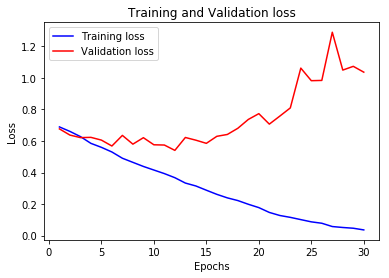

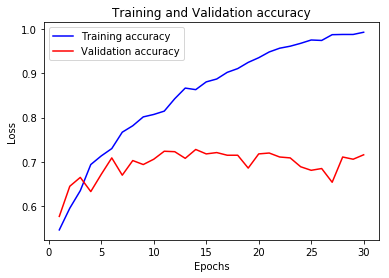

In [70]:
plot_history(history)

- These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

- Because we have relatively few training samples (2,000), overfitting will be our number-one concern. we already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation.
